In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("churn.csv")

churn = df.copy()

In [2]:
churn.shape

(7043, 21)

We have 7043 examples and 21 columns (20 features\variables and one label). Let's look at the data

In [3]:
churn.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [4]:
churn = churn.rename(columns=str.lower)
churn

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Label to numeric

In [6]:
churn.churn = (churn.churn=='Yes').astype(int)

Drop some features which aren't informative

In [7]:
churn = churn.drop(['customerid'], axis=1)

In [8]:
churn.head(10)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


# Checking for missing values

In [9]:
import numpy as np

churn["totalcharges"] = churn["totalcharges"].replace(" ", np.nan)
churn.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [10]:
# Display rows where totalcharges is null
missing_totalcharges = churn[churn["totalcharges"].isnull()]

# Show relevant columns
print(missing_totalcharges[["tenure", "monthlycharges", "totalcharges"]])

      tenure  monthlycharges totalcharges
488        0           52.55          NaN
753        0           20.25          NaN
936        0           80.85          NaN
1082       0           25.75          NaN
1340       0           56.05          NaN
3331       0           19.85          NaN
3826       0           25.35          NaN
4380       0           20.00          NaN
5218       0           19.70          NaN
6670       0           73.35          NaN
6754       0           61.90          NaN


In [11]:
#Since these are new customers (tenure = 0), they likely haven't been billed yet, meaning their totalcharges should logically be 0.

churn["totalcharges"] = pd.to_numeric(churn["totalcharges"], errors="coerce")  # Converts to float
churn["totalcharges"] = churn["totalcharges"].fillna(0)  # Replace NaNs with 0

churn.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

No missing values!

# Changing features to numeric

In [12]:
churn.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

Most of the types are objects while we need them to be int/float

In [13]:
#Looking at the unique values of each column to understand how to change the features to numeric

for column in churn.columns:
    unique_values = churn[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 50)


Unique values in 'gender':
['Female' 'Male']
--------------------------------------------------
Unique values in 'seniorcitizen':
[0 1]
--------------------------------------------------
Unique values in 'partner':
['Yes' 'No']
--------------------------------------------------
Unique values in 'dependents':
['No' 'Yes']
--------------------------------------------------
Unique values in 'tenure':
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
Unique values in 'phoneservice':
['No' 'Yes']
--------------------------------------------------
Unique values in 'multiplelines':
['No phone service' 'No' 'Yes']
--------------------------------------------------
Unique values in 'internetservice':
['DSL' 'Fiber optic' 'No']
-----------------------------------------------

In [14]:
# Categorical columns to numeric
# Columns partner, dependents, phoneservice, and paperlessbilling are 'Yes'/'No' columns that can be easily changed to 0,1

churn.partner = churn.partner.map({'Yes':1, 'No':0})

churn.dependents = churn.dependents.map({'Yes':1, 'No':0})

churn.phoneservice = churn.phoneservice.map({'Yes':1, 'No':0})

churn.paperlessbilling = churn.paperlessbilling.map({'Yes':1, 'No':0})

In [15]:
churn.dtypes

gender               object
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling      int64
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

We're left with the columns that have 3 values

# Categorical values to 1-hot

The columns gender, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, and paymentmethod are categorical values that need to be changed to 1-hot

In [16]:
categorical_columns = ["gender", "multiplelines", "internetservice", "onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies", "contract", "paymentmethod"]

churn = pd.get_dummies(churn, columns=categorical_columns).astype(int)
churn.head(10)

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,...,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,1,0,1,29,29,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56,1889,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53,108,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42,1840,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70,151,1,1,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99,820,1,1,...,0,0,1,1,0,0,0,0,1,0
6,0,0,1,22,1,1,89,1949,0,0,...,1,0,0,1,0,0,0,1,0,0
7,0,0,0,10,0,0,29,301,0,1,...,1,0,0,1,0,0,0,0,0,1
8,0,1,0,28,1,1,104,3046,1,1,...,0,0,1,1,0,0,0,0,1,0
9,0,0,1,62,1,0,56,3487,0,0,...,1,0,0,0,1,0,1,0,0,0


Changed the data from 20 features and one label to 41 features and one label

In [17]:
churn.dtypes

seniorcitizen                              int64
partner                                    int64
dependents                                 int64
tenure                                     int64
phoneservice                               int64
paperlessbilling                           int64
monthlycharges                             int64
totalcharges                               int64
churn                                      int64
gender_Female                              int64
gender_Male                                int64
multiplelines_No                           int64
multiplelines_No phone service             int64
multiplelines_Yes                          int64
internetservice_DSL                        int64
internetservice_Fiber optic                int64
internetservice_No                         int64
onlinesecurity_No                          int64
onlinesecurity_No internet service         int64
onlinesecurity_Yes                         int64
onlinebackup_No     

All features are numeric!

However, it appears that some of the columns are redundant. 

All of the columns that have No_internetservice, because the column internetservice_No is sufficient. 

Also, multiplelines_No phone service is redudant because phoneservice column is sufficient

In [18]:
# List of redundant columns to drop
redundant_columns = [
    "onlinesecurity_No internet service",
    "onlinebackup_No internet service",
    "deviceprotection_No internet service",
    "techsupport_No internet service",
    "streamingtv_No internet service",
    "streamingmovies_No internet service",
    "multiplelines_No phone service"
]

# Drop redundant columns from the DataFrame
churn = churn.drop(columns=redundant_columns)

churn.head(5)

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,1,0,1,29,29,0,1,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56,1889,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53,108,1,0,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42,1840,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70,151,1,1,...,0,1,0,1,0,0,0,0,1,0


Cleaned the data from 41 features and one label to 34 features and one label

<br>
<br>
<hr class="dotted">
<br>
<br>

# Finding interesting relationships

What is the label distibution

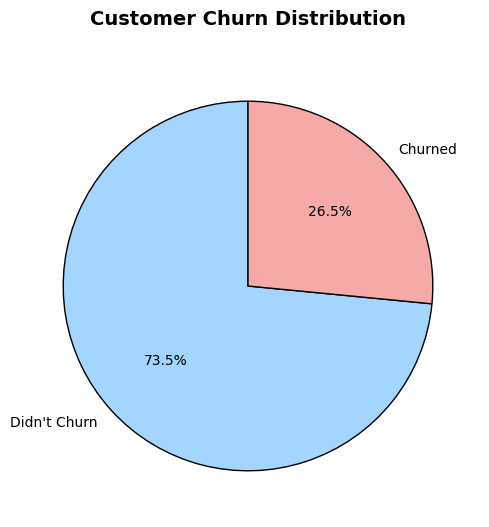

In [19]:
# Creating a dictionary for labels
churn_labels = {0: "Didn't Churn", 1: "Churned"}

# Get churn proportions
churn_counts = churn.churn.value_counts(normalize=True)

# Set up figure
fig, ax = plt.subplots(figsize=(6, 6))

# Define colors
colors = ["#A3D5FF", "#F7A9A8"]

# Create pie chart
ax.pie(
    churn_counts.values, 
    labels=[churn_labels[key] for key in churn_counts.index], 
    autopct='%1.1f%%', 
    colors=colors,
    startangle=90, 
    wedgeprops={"edgecolor": "black"}
)

# Add title
plt.title("Customer Churn Distribution\n", fontsize=14, fontweight="bold")

# Show plot
plt.show()

~26% of the customers churned and ~73% didn't

In [20]:
# Statistics of the data

churn.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.295897,2279.265086,0.265370,0.495244,...,0.384353,0.395428,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.092727,2266.790864,0.441561,0.500013,...,0.486477,0.488977,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.000000,398.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.000000,1394.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.000000,3786.500000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.000000,8684.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
churn.corr()

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,...,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220129,0.103008,0.150889,0.001874,...,0.105378,0.034210,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096913,0.317503,-0.150448,0.001808,...,0.124666,-0.117529,0.117412,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113910,0.062078,-0.164221,-0.010517,...,-0.016558,-0.078198,-0.039741,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247917,0.826179,-0.352229,-0.005106,...,0.279756,-0.252220,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
phoneservice,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247277,0.113213,0.011942,0.006488,...,-0.022574,-0.112254,-0.032959,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
paperlessbilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352138,0.158574,0.191825,0.011754,...,0.223841,0.059488,0.211716,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
monthlycharges,0.220129,0.096913,-0.113910,0.247917,0.247277,0.352138,1.000000,0.651237,0.193422,0.014892,...,0.629562,0.018046,0.627421,0.060092,0.004979,-0.074667,0.042497,0.030778,0.271746,-0.377487
totalcharges,0.103008,0.317503,0.062078,0.826179,0.113213,0.158574,0.651237,1.000000,-0.198326,0.000079,...,0.514973,-0.202190,0.520123,-0.444255,0.170812,0.354482,0.185985,0.182915,-0.059246,-0.295757
churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193422,-0.198326,1.000000,0.008612,...,0.063228,0.130845,0.061382,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.011754,0.014892,0.000079,0.008612,1.000000,...,0.008393,-0.005374,0.010487,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744


<Axes: >

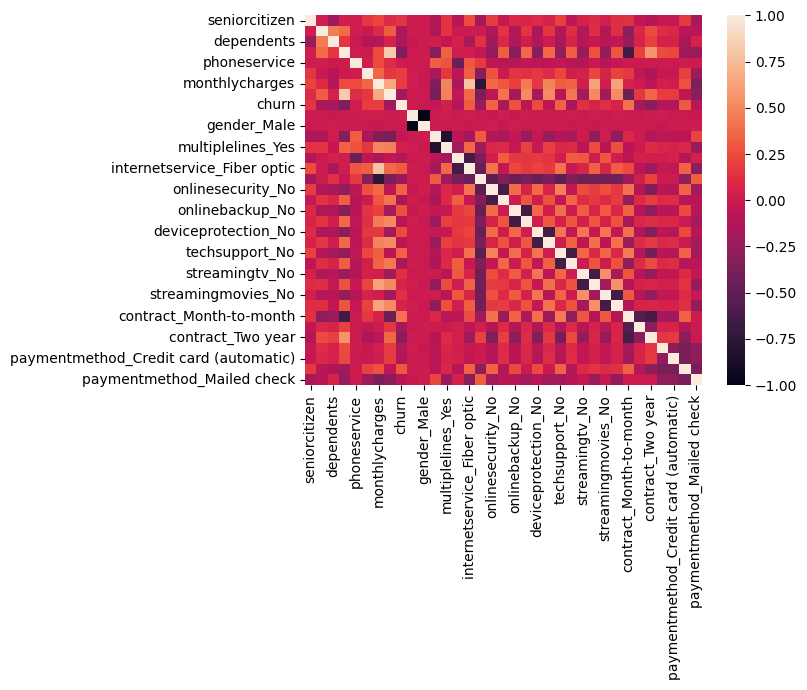

In [22]:
# Correlation matrix to heat map
sns.heatmap(churn.corr())

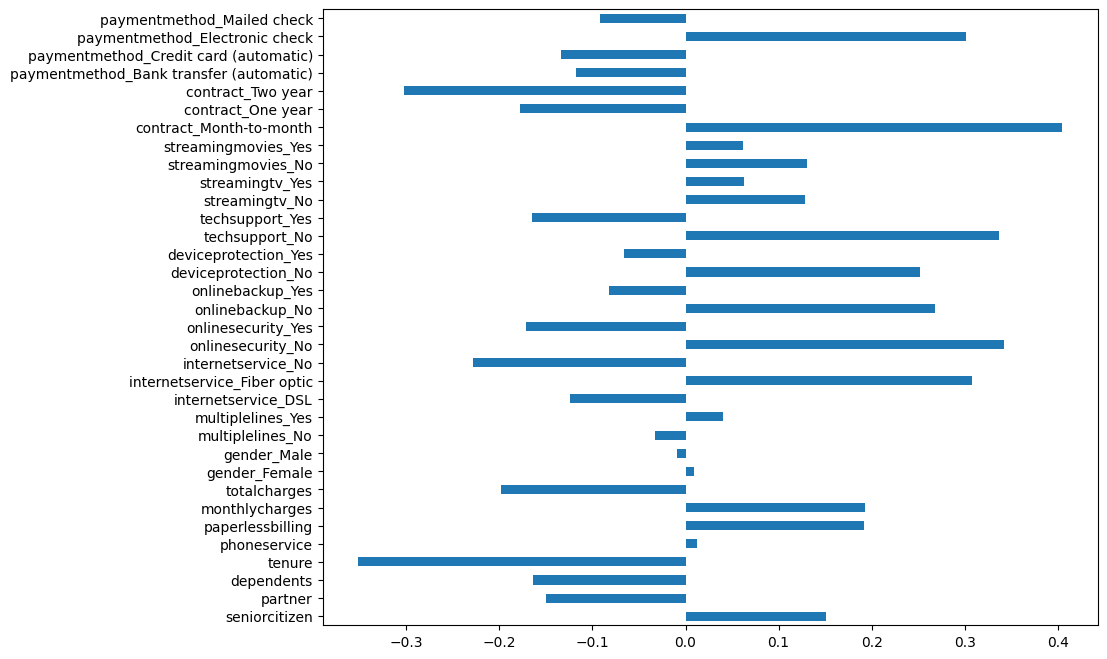

In [23]:
# Correlation with churn viewed in a horizontal bar chart

plt.figure(figsize=(10, 8))  # Adjust the figure size
churn.corr()['churn'].drop('churn').plot(kind='barh')
plt.yticks(rotation=0)  # Keep labels horizontal for better readability
plt.show()


Columns with correlation close to zero: ['phoneservice', 'gender_Female', 'gender_Male', 'multiplelines_No', 'multiplelines_Yes']


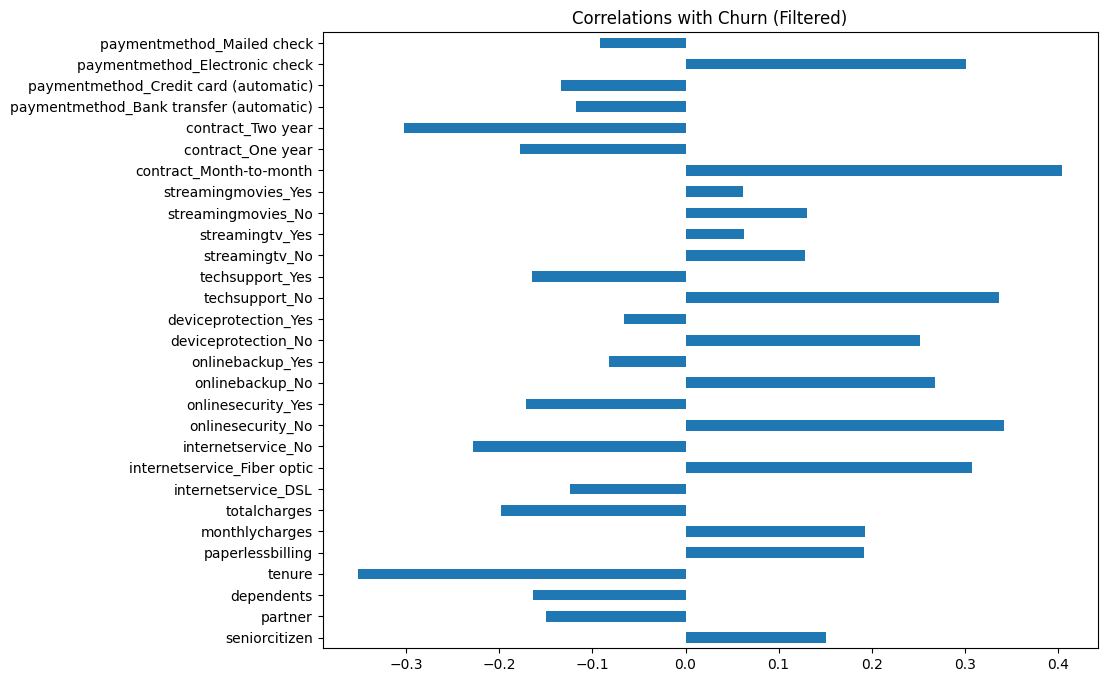

In [24]:
#Improving the bar chart to understand better- get rid of features with correlation very close to 0

# Compute the correlation with churn
correlation = churn.corr()['churn'].drop('churn')

# Define a threshold for low correlation
threshold = 0.05

# Identify columns where correlation is close to zero
low_correlation_cols = correlation[np.abs(correlation) < threshold].index.tolist()

# Display the columns with low correlation
print("Columns with correlation close to zero:", low_correlation_cols)

# Filter out these columns and re-plot
filtered_correlation = correlation.drop(low_correlation_cols)

# Plot the updated correlation chart

plt.figure(figsize=(10, 8))
filtered_correlation.plot(kind='barh')
plt.yticks(rotation=0)
plt.title("Correlations with Churn (Filtered)")
plt.show()


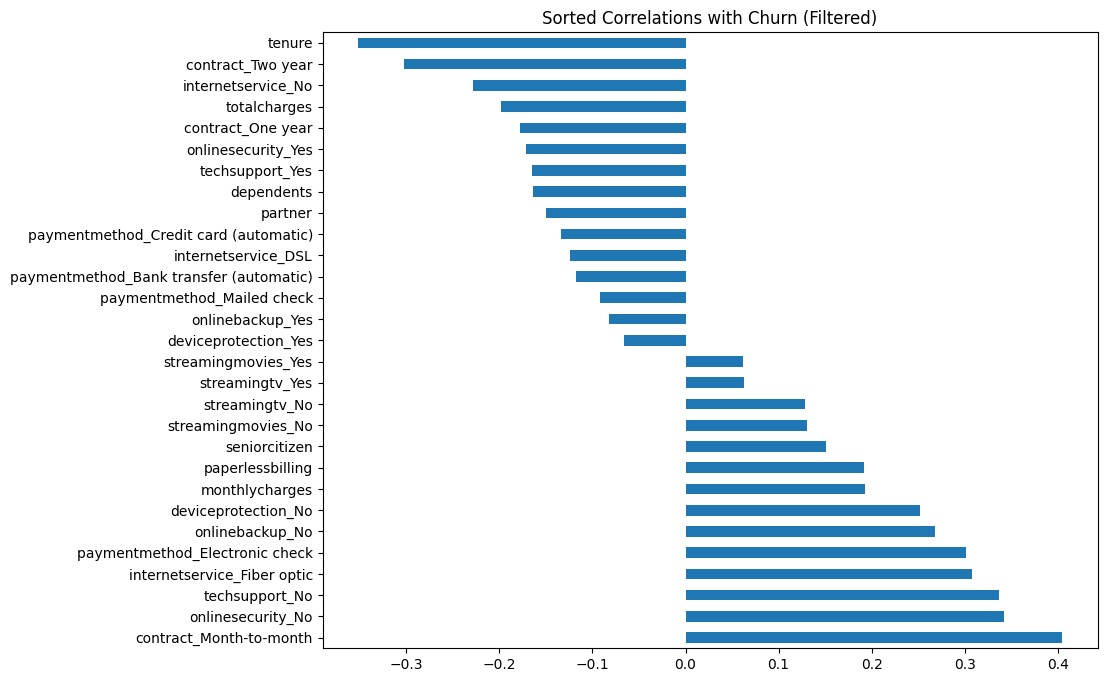

contract_Month-to-month                    0.405103
onlinesecurity_No                          0.342637
techsupport_No                             0.337281
internetservice_Fiber optic                0.308020
paymentmethod_Electronic check             0.301919
onlinebackup_No                            0.268005
deviceprotection_No                        0.252481
monthlycharges                             0.193422
paperlessbilling                           0.191825
seniorcitizen                              0.150889
streamingmovies_No                         0.130845
streamingtv_No                             0.128916
streamingtv_Yes                            0.063228
streamingmovies_Yes                        0.061382
deviceprotection_Yes                      -0.066160
onlinebackup_Yes                          -0.082255
paymentmethod_Mailed check                -0.091683
paymentmethod_Bank transfer (automatic)   -0.117937
internetservice_DSL                       -0.124214
paymentmetho

In [25]:
#Improving the graph even more-->

# Sort the correlations in descending order
sorted_correlation = filtered_correlation.sort_values(ascending=False)

# Plot the sorted correlation chart
plt.figure(figsize=(10, 8))
sorted_correlation.plot(kind='barh')
plt.yticks(rotation=0)
plt.title("Sorted Correlations with Churn (Filtered)")
plt.show()

# Display the sorted correlations
print(sorted_correlation)


The columns that appear to be the most correlated to churn are: 

1. contract

2. tenure

3. online security

4. tech support

5. internet service

6. payment method

7. monthly charges

# Zooming in on the Most Correlated Features to Churn

## 1. Contract
What is the feature distribution?

In [26]:
contract_distribution = churn[['contract_Month-to-month', 'contract_One year', 'contract_Two year']].value_counts(normalize=True).sort_index()

contract_distribution

contract_Month-to-month  contract_One year  contract_Two year
0                        0                  1                    0.240664
                         1                  0                    0.209144
1                        0                  0                    0.550192
Name: proportion, dtype: float64

In [27]:
# What is the churn?

churn_by_contract = churn.groupby(['contract_Month-to-month', 'contract_One year', 'contract_Two year']).churn.mean()
churn_by_contract

contract_Month-to-month  contract_One year  contract_Two year
0                        0                  1                    0.028319
                         1                  0                    0.112695
1                        0                  0                    0.427097
Name: churn, dtype: float64

In [28]:
contract_summary = pd.DataFrame({'Distribution': contract_distribution, 'Churn Rate': churn_by_contract})
contract_summary.index = ['Two year', 'One year','Month-to-month']
contract_summary

,Distribution,Churn Rate
Two year,0.240664,0.028319
One year,0.209144,0.112695
Month-to-month,0.550192,0.427097


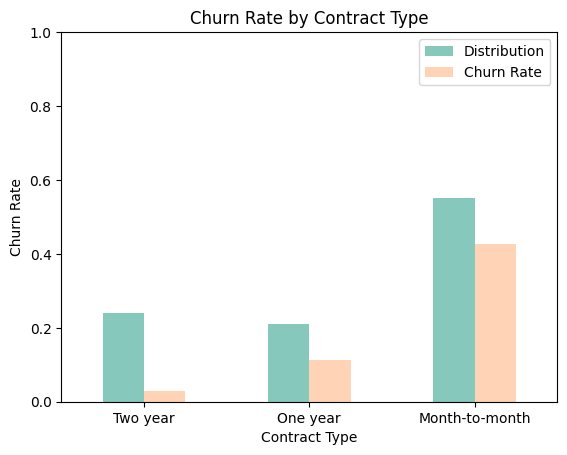

In [29]:
contract_summary.plot(kind='bar', color=["#86C8BC", "#FFD3B5"])
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.title('Churn Rate by Contract Type');

Month-to-month customers have the highest churn (42.7%), while two-year contract customers have the lowest (2.8%).

## 2. Tenure

Create a new variable (column) that will divide the customers in 6 tenure categories:

New: 0-6 months

Early: 7-12 months

Growing: 13-24 months

Loyal: 25-48 months

Very Loyal: 49-72 months

Long-Term: 70+ months

How many (number and percent) churned on each tenure group? (We will use the mean function as the percentage).

In [30]:
### create the categorical variable called "TenureGroup"

churn['TenureGroup'] = None
churn['TenureGroup_sort'] = None
churn.head()

# Insert values to each line as above
# '0-6'
# '7-12'
# '13-24'
# '25-48'
# '49-69'
# '70+'

churn.loc[(churn['tenure'] < 7),'TenureGroup'] = '0-6'
churn.loc[(churn['tenure'] < 7),'TenureGroup_sort'] = 1

churn.loc[(churn['tenure'] >=7.) &(churn['tenure'] < 13),'TenureGroup'] = '7-12'
churn.loc[(churn['tenure'] >=7.) &(churn['tenure'] < 13),'TenureGroup_sort'] = 2

churn.loc[(churn['tenure'] >=13.) & (churn['tenure'] < 25.),'TenureGroup'] = '13-24'
churn.loc[(churn['tenure'] >=13.) & (churn['tenure'] < 25.),'TenureGroup_sort'] = 3

churn.loc[(churn['tenure'] >=25.) & (churn['tenure'] < 49.),'TenureGroup'] = '25-48'
churn.loc[(churn['tenure'] >=25.) & (churn['tenure'] < 49.),'TenureGroup_sort'] = 4

churn.loc[(churn['tenure'] >=49.) & (churn['tenure'] < 70.),'TenureGroup'] = '49-69'
churn.loc[(churn['tenure'] >=49.) & (churn['tenure'] < 70.),'TenureGroup_sort'] = 5

churn.loc[(churn['tenure'] >= 70.),'TenureGroup'] = '70+'
churn.loc[(churn['tenure'] >= 70.),'TenureGroup_sort'] = 6

churn_tenure_group = churn.groupby(['TenureGroup', 'TenureGroup_sort'], as_index=False).agg({'churn':['count','sum','mean']}).sort_values(by = ['TenureGroup_sort'])
churn_tenure_group

TenureGroup TenureGroup_sort churn               
                               count  sum      mean
0         0-6                1  1481  784  0.529372
4        7-12                2   705  253  0.358865
1       13-24                3  1024  294  0.287109
2       25-48                4  1594  325  0.203890
3       49-69                5  1588  190  0.119647
5         70+                6   651   23  0.035330

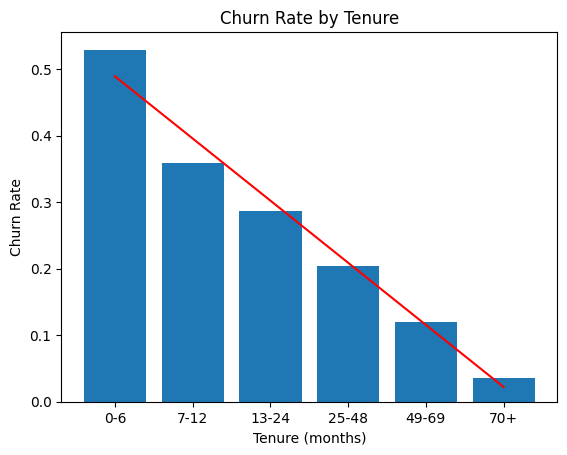

In [31]:
# Fit a linear trendline
axis_x_numeric = np.arange(len(churn_tenure_group.TenureGroup))

slope, intercept = np.polyfit(axis_x_numeric, churn_tenure_group.churn['mean'], 1) # 1 indicates linear
trenline = slope * axis_x_numeric + intercept

# Adding a trendline to bar chart
plt.bar(x=churn_tenure_group.TenureGroup, height=churn_tenure_group.churn['mean'])

plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure');
plt.plot(churn_tenure_group.TenureGroup, trenline, color='red', label='trenline')
plt.show()

As tenure increases, churn percentage consistently decreases, indicating that customers who stay longer are significantly less likely to leave. This suggests that retention efforts should be focused on newer customers, as they are the most likely to churn.

## 3. Online Security

In [32]:
online_security_distribution = churn[['onlinesecurity_No', 'onlinesecurity_Yes']].value_counts(normalize=True).sort_index()

churn_by_online_security = churn.groupby(['onlinesecurity_No', 'onlinesecurity_Yes']).churn.mean()

online_security_summary = pd.DataFrame({'Distribution': online_security_distribution, 'Churn Rate': churn_by_online_security})

online_security_summary = online_security_summary.loc[~((online_security_summary.index.get_level_values('onlinesecurity_No') == 0) &
                                                        (online_security_summary.index.get_level_values('onlinesecurity_Yes') == 0))]
online_security_summary

,,Distribution,Churn Rate
onlinesecurity_No,onlinesecurity_Yes,,
0,1,0.286668,0.146112
1,0,0.496663,0.417667


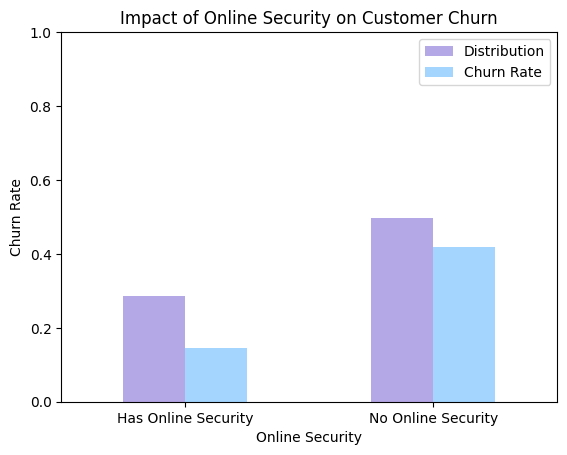

In [33]:
ax = online_security_summary.plot(kind='bar',color=["#B5A8E6", "#A3D5FF"])
plt.xlabel('Online Security')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
ax.set_xticklabels(['Has Online Security','No Online Security'])
plt.title('Impact of Online Security on Customer Churn');

Customers without online security are more likely to churn

## 4. Tech Support

In [34]:
tech_support_distribution = churn[['techsupport_Yes', 'techsupport_No']].value_counts(normalize=True).sort_index()

churn_by_tech_support = churn.groupby(['techsupport_Yes', 'techsupport_No']).churn.mean()

tech_support_summary = pd.DataFrame({'Distribution': tech_support_distribution, 'Churn Rate': churn_by_tech_support})

tech_support_summary = tech_support_summary.loc[~((tech_support_summary.index.get_level_values('techsupport_Yes') == 0) &
                                                        (tech_support_summary.index.get_level_values('techsupport_No') == 0))]
tech_support_summary

,,Distribution,Churn Rate
techsupport_Yes,techsupport_No,,
0,1,0.493114,0.416355
1,0,0.290217,0.151663


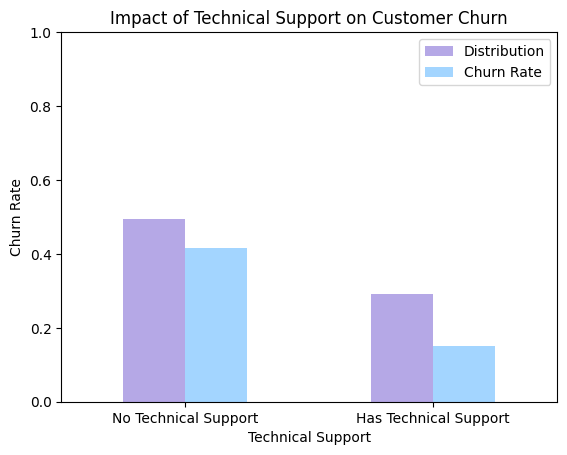

In [35]:
ax = tech_support_summary.plot(kind='bar',color=["#B5A8E6", "#A3D5FF"])
plt.xlabel('Technical Support')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
ax.set_xticklabels(['No Technical Support','Has Technical Support'])
plt.title('Impact of Technical Support on Customer Churn');

Customers without technical support are more likely to churn

## 5. Internet Service

In [36]:
internet_service_distribution = churn[['internetservice_DSL', 'internetservice_Fiber optic','internetservice_No']].value_counts(normalize=True).sort_index()

churn_by_internet_service = churn.groupby(['internetservice_DSL', 'internetservice_Fiber optic','internetservice_No']).churn.mean()

internet_service_summary = pd.DataFrame({'Distribution': internet_service_distribution, 'Churn Rate': churn_by_internet_service})

internet_service_summary

Distribution  \
internetservice_DSL internetservice_Fiber optic internetservice_No                 
0                   0                           1                       0.216669   
                    1                           0                       0.439585   
1                   0                           0                       0.343746   

                                                                    Churn Rate  
internetservice_DSL internetservice_Fiber optic internetservice_No              
0                   0                           1                     0.074050  
                    1                           0                     0.418928  
1                   0                           0                     0.189591

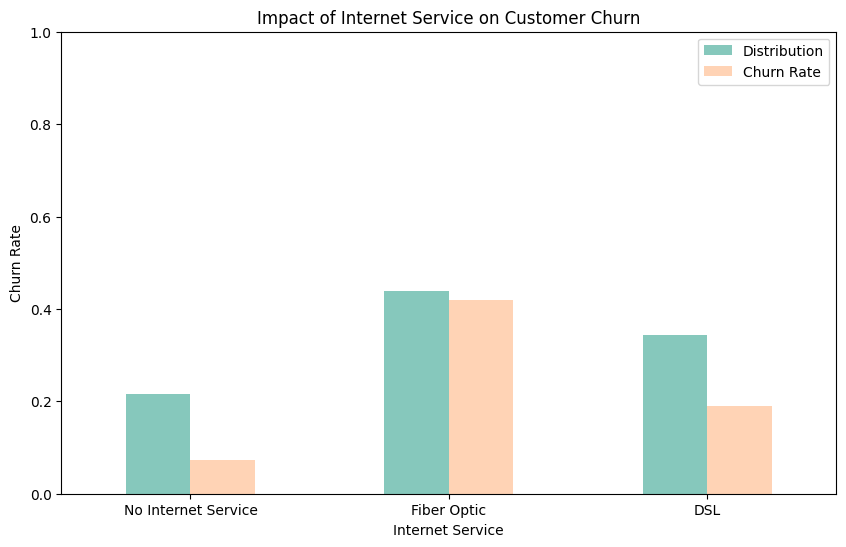

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
internet_service_summary.plot(kind='bar', ax=ax, color=["#86C8BC", "#FFD3B5"])
plt.xlabel('Internet Service')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
ax.set_xticklabels(['No Internet Service','Fiber Optic','DSL'])
plt.title('Impact of Internet Service on Customer Churn');

Customers with Fiber Optic service have the highest churn rate (~41.9%), compared to DSL (19%) and No Internet Service (7.4%).

## 6. Payment Method

In [38]:
payment_method_distribution = churn[['paymentmethod_Bank transfer (automatic)', 'paymentmethod_Credit card (automatic)','paymentmethod_Electronic check','paymentmethod_Mailed check']].value_counts(normalize=True).sort_index()

churn_by_payment_method = churn.groupby(['paymentmethod_Bank transfer (automatic)', 'paymentmethod_Credit card (automatic)','paymentmethod_Electronic check','paymentmethod_Mailed check']).churn.mean()

payment_method_summary = pd.DataFrame({'Distribution': payment_method_distribution, 'Churn Rate': churn_by_payment_method})

payment_method_summary

Distribution  \
paymentmethod_Bank transfer (automatic) paymentmethod_Credit card (automatic) paymentmethod_Electronic check paymentmethod_Mailed check                 
0                                       0                                     0                              1                               0.228880   
                                                                              1                              0                               0.335794   
                                        1                                     0                              0                               0.216101   
1                                       0                                     0                              0                               0.219225   

                                                                                                                                         Churn Rate  
paymentmethod_Bank transfer (automatic) paymentmethod_Credit card (automatic) paymentmethod_Electronic check paymentmethod_Mailed check              
0                                       0                                     0                              1                             0.191067  
                                                                              1                              0                             0.452854  
                                        1                                     0                              0                             0.152431  
1                                       0                                     0                              0                             0.167098

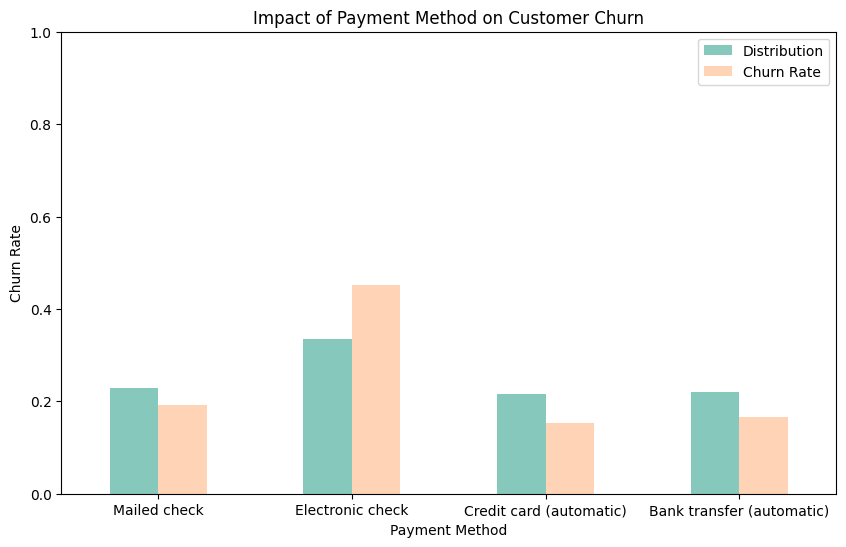

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
payment_method_summary.plot(kind='bar', ax=ax, color=["#86C8BC", "#FFD3B5"])
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
ax.set_xticklabels(['Mailed check','Electronic check','Credit card (automatic)','Bank transfer (automatic)'])
plt.title('Impact of Payment Method on Customer Churn');

Customers using Electronic Check have the highest churn rate (~45%), significantly higher than other payment methods.

## 7. Monthly Charges

In [40]:
churn['monthlycharges'].describe()

count    7043.000000
mean       64.295897
std        30.092727
min        18.000000
25%        35.000000
50%        70.000000
75%        89.000000
max       118.000000
Name: monthlycharges, dtype: float64

We will create a new Variable "ChargeGroup"

We will use the data on the desctiptive table to divide the paid charges:

- Those who paid more than the 75% where considered 'Overpaid'
- If the customer paid less than the 25% they where categorized as 'Underpaid'
- Else 'Normal' fare

In [41]:
churn['ChargeGroup'] = 'Normal (between 25% and 75% percentile)'

churn.loc[(churn['monthlycharges']<35.50),'ChargeGroup'] = 'Underpaid (below 25% percentile)'

churn.loc[(churn['monthlycharges']>89.850),'ChargeGroup'] = 'Overpaid (above 75% percentile)'

churn.groupby('ChargeGroup').agg({'churn':['count','sum','mean']})


churn                
                                        count   sum      mean
ChargeGroup                                                  
Normal (between 25% and 75% percentile)  3518  1095  0.311256
Overpaid (above 75% percentile)          1744   573  0.328555
Underpaid (below 25% percentile)         1781   201  0.112858

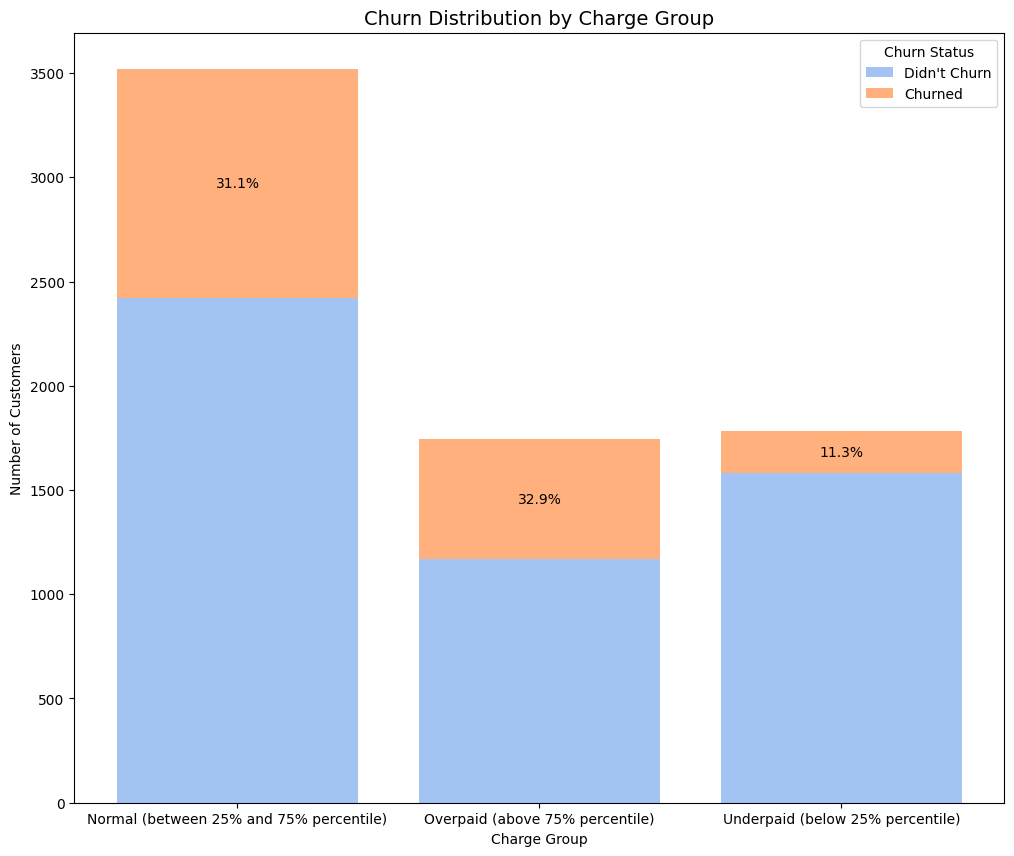

In [42]:
# Calculate churn counts per ChargeGroup
churn_counts = churn.groupby(['ChargeGroup', 'churn']).size().unstack()

# Calculate churn rates
churn_rates = churn_counts[1] / churn_counts.sum(axis=1)

# Set up figure
fig, ax = plt.subplots(figsize=(12, 10))

# Plot stacked bars
bars1 = ax.bar(churn_counts.index, churn_counts[0], color='#A3C4F3', label="Didn't Churn")
bars2 = ax.bar(churn_counts.index, churn_counts[1], bottom=churn_counts[0], color='#FFB07C', label="Churned")

# Add churn rate as text annotations inside the churned (orange) part
for bar, churn_rate in zip(bars2, churn_rates):
    height = bar.get_y() + bar.get_height() / 2  # Position inside the orange section
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{churn_rate:.1%}', 
            ha='center', va='center', fontsize=10, color='black')

# Labels and title
ax.set_title("Churn Distribution by Charge Group", fontsize=14)
ax.set_xlabel("Charge Group")
ax.set_ylabel("Number of Customers")
ax.set_xticks(np.arange(len(churn_counts.index)))
ax.set_xticklabels(churn_counts.index)
ax.legend(title="Churn Status")

# Show plot
plt.show()

Overpaying customers have the highest churn rate (32.9%), followed closely by those in the Normal charge group (31.1%).

<br>
<br>
<hr class="dotted">
<br>
<br>

# Machine Learning

In [43]:
df_ml = churn.copy()
df_ml.head(5)

,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,gender_Female,...,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,TenureGroup,TenureGroup_sort,ChargeGroup
0,0,1,0,1,0,1,29,29,0,1,...,1,0,0,0,0,1,0,0-6,1,Underpaid (below 25% percentile)
1,0,0,0,34,1,0,56,1889,0,0,...,0,1,0,0,0,0,1,25-48,4,Normal (between 25% and 75% percentile)
2,0,0,0,2,1,1,53,108,1,0,...,1,0,0,0,0,0,1,0-6,1,Normal (between 25% and 75% percentile)
3,0,0,0,45,0,0,42,1840,0,0,...,0,1,0,1,0,0,0,25-48,4,Normal (between 25% and 75% percentile)
4,0,0,0,2,1,1,70,151,1,1,...,1,0,0,0,0,1,0,0-6,1,Normal (between 25% and 75% percentile)


#### Data Preparation

We'll remove columns that were used for visualizations- TenureGroup, TenureGroup_sort, and ChargeGroup.

Reintroducing the Customer ID column: While it wasn't informative for feature relationships to churn,
we need it now to trace back the machine learning results to the corresponding customer.

Moving the churn (label) column to the end for better readability. 

In [44]:
remove_columns = ['TenureGroup', 'TenureGroup_sort','ChargeGroup']

df_ml = df_ml.drop(columns=remove_columns)

df_ml['customerID'] = df['customerID']

cols = ['customerID'] + [col for col in df_ml.columns if col != 'customerID'] # customerID to the first position
df_ml = df_ml[cols]

cols = [col for col in df_ml.columns if col != 'churn'] + ['churn'] # churn to the Last Position
df_ml = df_ml[cols]

df_ml.head(5)


,customerID,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,gender_Female,...,streamingmovies_No,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn
0,7590-VHVEG,0,1,0,1,0,1,29,29,1,...,1,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56,1889,0,...,1,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53,108,0,...,1,0,1,0,0,0,0,0,1,1
3,7795-CFOCW,0,0,0,45,0,0,42,1840,0,...,1,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70,151,1,...,1,0,1,0,0,0,0,1,0,1


## Train- Test Splitting

We have 7043 examples -->  we'll use 20% (~1400) for the test and the rest for the training.

In [45]:
# pip install scikit-learn

In [46]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_ml, test_size=0.2, random_state=42, shuffle=True)

#Train dataset

x_train = train.drop('churn', axis=1)
x_train = x_train.drop('customerID', axis=1)
y_train = train['churn']
cust_train = train['customerID']

#Test dataset

x_test = test.drop('churn', axis=1)
x_test = x_test.drop('customerID', axis=1)
y_test = test['churn']
cust_test = test['customerID']

In [47]:
print(f"Train dataset shape: {x_train.shape}")
print(f"Train label: {y_train.shape}")
print(f"Train customerID: {cust_train.shape}")
print(f"Test dataset shape: {x_test.shape}")
print(f"Test label: {y_test.shape}")
print(f"Test customerID: {cust_test.shape}")

Train dataset shape: (5634, 34)
Train label: (5634,)
Train customerID: (5634,)
Test dataset shape: (1409, 34)
Test label: (1409,)
Test customerID: (1409,)


In [48]:
print("Train dataset preview:")
print(x_train.head(10))

print("\nTest dataset preview:")
print(x_test.head(10))

Train dataset preview:
      seniorcitizen  partner  dependents  tenure  phoneservice  \
2142              0        0           1      21             1   
1623              0        0           0      54             1   
6074              0        1           0       1             0   
1362              0        0           0       4             1   
6754              0        0           1       0             1   
1212              0        0           0       7             1   
2722              0        1           1      32             1   
4006              0        1           1      72             1   
6791              0        0           0      19             0   
5466              0        0           1      10             1   

      paperlessbilling  monthlycharges  totalcharges  gender_Female  \
2142                 0              64          1336              1   
1623                 1              97          5129              1   
6074                 1              2

Train dataset label distribution:
churn
0    4138
1    1496
Name: count, dtype: int64


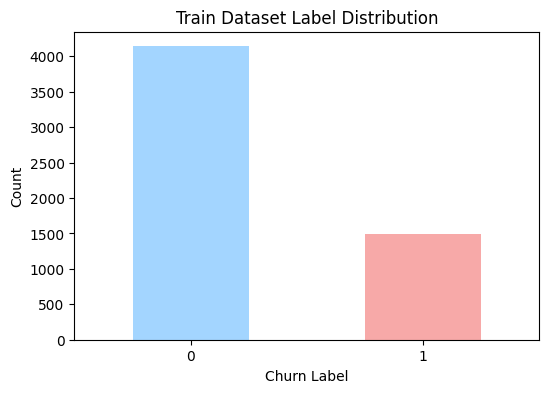

In [49]:
# Count the occurrences of each class
label_counts = y_train.value_counts()

# Print the counts
print("Train dataset label distribution:")
print(label_counts)

# Visualize the distribution with a bar plot
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=["#A3D5FF", "#F7A9A8"])
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.title("Train Dataset Label Distribution")
plt.xticks(rotation=0)
plt.show()

Test dataset label distribution:
churn
0    1036
1     373
Name: count, dtype: int64


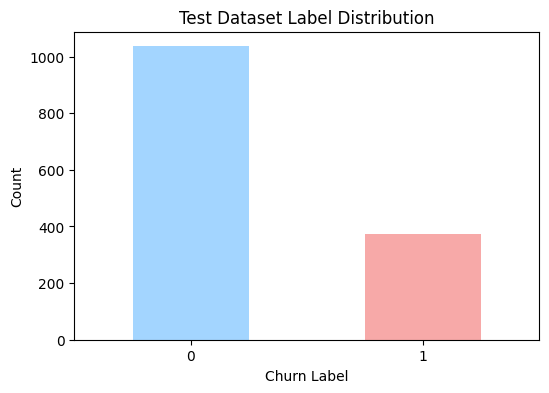

In [50]:
# Count the occurrences of each class
label_counts = y_test.value_counts()

# Print the counts
print("Test dataset label distribution:")
print(label_counts)

# Visualize the distribution with a bar plot
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=["#A3D5FF", "#F7A9A8"])
plt.xlabel("Churn Label")
plt.ylabel("Count")
plt.title("Test Dataset Label Distribution")
plt.xticks(rotation=0)
plt.show()

Training and test datasets look good!

# KNN - K Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the algorithm

clf = KNeighborsClassifier(n_neighbors=3)
# define the algorithm:
    # arg:
        # n_neighbors = number of neighbors

clf.fit(x_train, y_train) # running\training the algorithm with the train data

y_test_pred_Knn = clf.predict(x_test) # making a prediction based on "test" data features

KNN_output = pd.DataFrame({'customerID': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
KNN_output.head(20)

,customerID,churned_what_actualy_happened,churned_predicted_by_model
185,1024-GUALD,1,1
2715,0484-JPBRU,0,0
3825,3620-EHIMZ,0,0
1807,6910-HADCM,1,1
132,8587-XYZSF,0,0
1263,6818-WOBHJ,1,0
3732,3082-YVEKW,0,1
1672,4737-AQCPU,0,0
811,4853-RULSV,1,0
2526,5766-ZJYBB,1,1


#### Evaluation for KNN

In [52]:
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

In [53]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7665010645848119

#### Improving the accuracy

1. Scale the features

In [54]:
from sklearn.preprocessing import StandardScaler # import the libraries

scaler = StandardScaler() # define

x_train_scaled = scaler.fit_transform(x_train) # Fit to data, then transform it.
x_test_scaled = scaler.transform(x_test) # Perform standardization by centering and scaling

2. Try different K values

In [55]:
# Define the range of K values (only odd numbers)
k_values = list(range(1, 71, 2))  # Odd values from 1 to 69
best_k = None
best_accuracy = 0
results = []

# Try different K values
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train_scaled, y_train)
    y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred_Knn_Scaled)
    results.append((k, accuracy))
    
    # Keep track of the best K
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        
KNN_results_df = pd.DataFrame(results, columns=["K", "Accuracy"])
print(KNN_results_df)

print(f"K: {best_k} with highest accuracy: {best_accuracy:.4f}")

     K  Accuracy
0    1  0.729595
1    3  0.757275
2    5  0.777857
3    7  0.783534
4    9  0.784954
5   11  0.787083
6   13  0.789922
7   15  0.789922
8   17  0.790632
9   19  0.794890
10  21  0.796309
11  23  0.794890
12  25  0.791341
13  27  0.793471
14  29  0.797729
15  31  0.799858
16  33  0.804116
17  35  0.800568
18  37  0.800568
19  39  0.799148
20  41  0.801278
21  43  0.804116
22  45  0.803407
23  47  0.804826
24  49  0.800568
25  51  0.801987
26  53  0.801987
27  55  0.804116
28  57  0.803407
29  59  0.799858
30  61  0.799148
31  63  0.800568
32  65  0.806246
33  67  0.811923
34  69  0.806246
K: 67 with highest accuracy: 0.8119


In [56]:
KNN_output_scaled = pd.DataFrame({'customerID': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_Knn_Scaled}) # saving results to DataFrame
KNN_output_scaled.head(20)

,customerID,churned_what_actualy_happened,churned_predicted_by_model
185,1024-GUALD,1,1
2715,0484-JPBRU,0,0
3825,3620-EHIMZ,0,0
1807,6910-HADCM,1,1
132,8587-XYZSF,0,0
1263,6818-WOBHJ,1,0
3732,3082-YVEKW,0,0
1672,4737-AQCPU,0,0
811,4853-RULSV,1,0
2526,5766-ZJYBB,1,0


3. Plotting the KNN Accuracy vs K Value to choose the best K (which might not be the one with the highest accuracy)

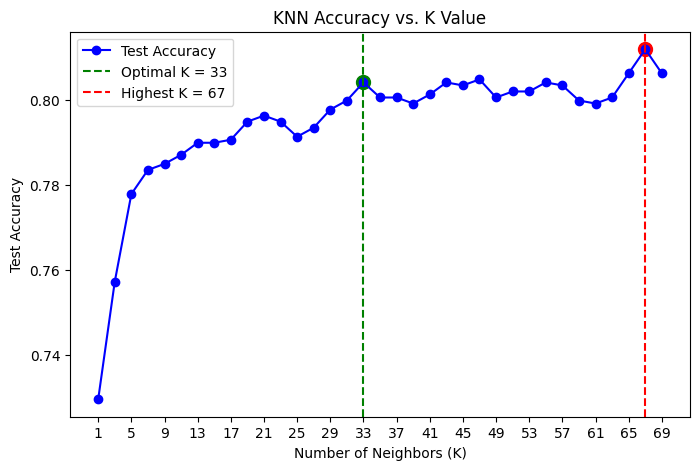

In [57]:
# Plot accuracy vs. K values
plt.figure(figsize=(8, 5))
plt.plot(KNN_results_df["K"], KNN_results_df["Accuracy"], marker="o", linestyle="-", color="b", label="Test Accuracy")

# Mark the optimal simpler K=33
optimal_k = 33
optimal_acc = KNN_results_df.loc[KNN_results_df["K"] == optimal_k, "Accuracy"].values[0]

plt.axvline(x=optimal_k, color="g", linestyle="--", label=f"Optimal K = {optimal_k}")
plt.scatter(optimal_k, optimal_acc, color="g", marker="o", s=100)  # Green dot for optimal K

# Mark the highest accuracy K
plt.axvline(x=best_k, color="r", linestyle="--", label=f"Highest K = {best_k}")
plt.scatter(best_k, best_accuracy, color="r", marker="o", s=100)  # Red dot for best K

# Labels and title
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Test Accuracy")
plt.title("KNN Accuracy vs. K Value")
plt.xticks(KNN_results_df["K"][::2])
plt.legend()

plt.show()

In [58]:
output = pd.DataFrame({'customerid': cust_test, 'churned_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn, 'churn_predicted_by_model_scaled':y_test_pred_Knn_Scaled}) # saving results to DataFrame
output.head(10)

,customerid,churned_what_actualy_happened,churn_predicted_by_model,churn_predicted_by_model_scaled
185,1024-GUALD,1,1,1
2715,0484-JPBRU,0,0,0
3825,3620-EHIMZ,0,0,0
1807,6910-HADCM,1,1,1
132,8587-XYZSF,0,0,0
1263,6818-WOBHJ,1,0,0
3732,3082-YVEKW,0,1,0
1672,4737-AQCPU,0,0,0
811,4853-RULSV,1,0,0
2526,5766-ZJYBB,1,1,0


### Conclusion:

Based on the results:

k=33 (accuracy: 0.804) for a simpler model with good performance
k=67 (accuracy: 0.812) gives the highest accuracy

The accuracy improvement from k=33 (0.804) to k=67 (0.812) is approximately 1%, so using a simpler model with comparable performance might be preferable.

# Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(x_train, y_train) 

y_test_pred_DT = clf.predict(x_test) 

RD_output = pd.DataFrame({'customerID': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_DT}) 
RD_output.head(20)

,customerID,churned_what_actualy_happened,churned_predicted_by_model
185,1024-GUALD,1,0
2715,0484-JPBRU,0,0
3825,3620-EHIMZ,0,0
1807,6910-HADCM,1,1
132,8587-XYZSF,0,0
1263,6818-WOBHJ,1,0
3732,3082-YVEKW,0,0
1672,4737-AQCPU,0,0
811,4853-RULSV,1,0
2526,5766-ZJYBB,1,0


#### Evaluation for Decision Tree

In [60]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_test_pred_DT)

accuracy = accuracy_score(y_test, y_test_pred_DT)

print(f"The accuracy_score is: {accuracy:.4f}%")

The accuracy_score is: 0.7956%


In [61]:
# pip install graphviz

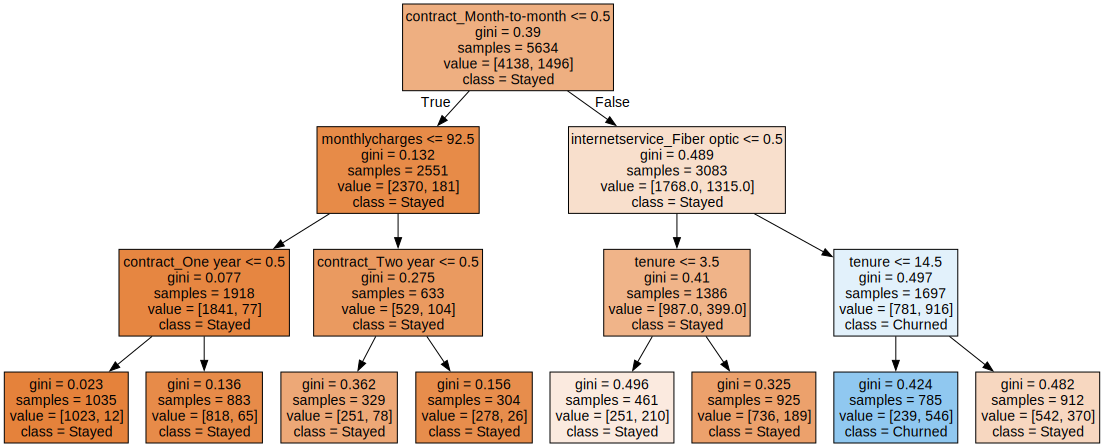

In [62]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['Stayed', 'Churned'])

The decision tree shows customer churn prediction based on several key factors. Contract type is the primary split, with month-to-month contracts showing higher churn risk (indicated by a gini impurity of 0.39). For month-to-month customers, monthly charges below 92.5 result in higher retention (gini=0.132). For customers without month-to-month contracts, having fiber optic internet service increases churn risk (gini=0.489), especially when combined with a tenure over 14.5 months (gini=0.497). Overall, the model identifies clear decision paths with varying levels of predictive purity, where lower gini values (closer to 0) indicate more homogeneous groups and better predictive confidence.

#### Improving the accuracy

* Trying different depth values

In [63]:
depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracies_test = []
accuracies_train = []

for depth in depth_values:
    clf = DecisionTreeClassifier(max_depth=depth)
    
    clf.fit(x_train, y_train)
    
    y_test_pred_DT = clf.predict(x_test)

    y_train_pred_DT = clf.predict(x_train)
    
    accuracy_test = accuracy_score(y_test, y_test_pred_DT)

    accuracy_train = accuracy_score(y_train, y_train_pred_DT)
    
    accuracies_test.append(accuracy_test)

    accuracies_train.append(accuracy_train)

best_depth_test = depth_values[accuracies_test.index(max(accuracies_test))]

best_depth_train = depth_values[accuracies_train.index(max(accuracies_train))]

print(f"Accuracy for each depth on test data set: {accuracies_test}")
print(" ")
print(f"Accuracy for each depth on train data set: {accuracies_train}")
print(" ")
print(f"The maximum accuracy for test data set is: {max(accuracies_test)}")
print(" ")
print(f"The maximum accuracy for train data set is: {max(accuracies_train)}")
print(" ")
print(f"The best max_depth for test data set is: {best_depth_test}")
print(" ")
print(f"The best max_depth for train data set is: {best_depth_train}")

Accuracy for each depth on test data set: [0.7352732434350603, 0.7785663591199432, 0.7955997161107168, 0.794180269694819, 0.7998580553584103, 0.8026969481902059, 0.794889992902768, 0.7785663591199432, 0.7750177430801988, 0.7615330021291696]
 
Accuracy for each depth on train data set: [0.7344692935747249, 0.758430954916578, 0.7889598864039759, 0.7957046503372383, 0.7994320198793042, 0.8099041533546326, 0.8194888178913738, 0.8358182463613774, 0.8494852680156194, 0.8725594604188853]
 
The maximum accuracy for test data set is: 0.8026969481902059
 
The maximum accuracy for train data set is: 0.8725594604188853
 
The best max_depth for test data set is: 6
 
The best max_depth for train data set is: 10


* Plotting the Decision Tree Accuracy vs max_depth Value to choose the best max_depth

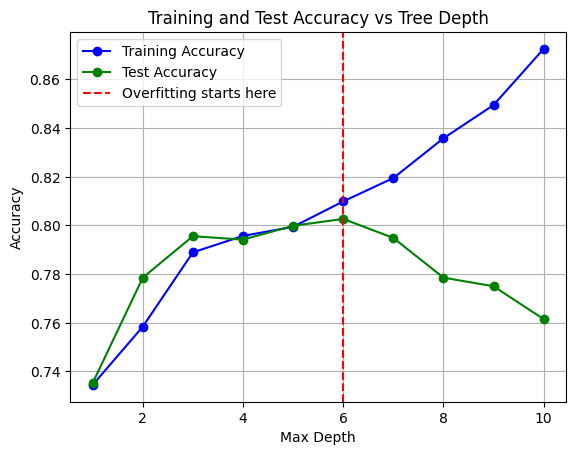

In [64]:
plt.plot(depth_values, accuracies_train, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(depth_values, accuracies_test, marker='o', linestyle='-', color='g', label='Test Accuracy')

plt.axvline(x=6, color='red', linestyle='--', label='Overfitting starts here')

plt.title('Training and Test Accuracy vs Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.grid(True)
plt.legend()
plt.show()

### Conclusion:

The depth for optimal accuracy on the test set is 6, while for the training set, it's 10.


This highlights the **overfitting** phenomenon, where a model becomes too complex and performs well on the training data but struggles to generalize to unseen test data
leading to lower accuracy on the test set.

# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score 

In [66]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) 

# Train the model on the training data
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Make predictions on the training set
y_train_pred = rf_model.predict(x_train)

# Verify predictions on test set
output = pd.DataFrame({'customerID': cust_test, 'customer_what_actualy_happened':y_test, 'customer_predicted_by_model': y_pred}) #saving results to DataFrame
output.head(10)

,customerID,customer_what_actualy_happened,customer_predicted_by_model
185,1024-GUALD,1,1
2715,0484-JPBRU,0,0
3825,3620-EHIMZ,0,0
1807,6910-HADCM,1,1
132,8587-XYZSF,0,0
1263,6818-WOBHJ,1,0
3732,3082-YVEKW,0,0
1672,4737-AQCPU,0,0
811,4853-RULSV,1,0
2526,5766-ZJYBB,1,0


#### Evaluating Model Performance 

In [67]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.8740
Test Accuracy: 0.8048


#### Improving the Model

n_estimators = 8, max_depth = 5, Train Accuracy = 0.8012, Test Accuracy = 0.7999
n_estimators = 8, max_depth = 7, Train Accuracy = 0.8138, Test Accuracy = 0.8105
n_estimators = 8, max_depth = 9, Train Accuracy = 0.8426, Test Accuracy = 0.7942
n_estimators = 8, max_depth = 10, Train Accuracy = 0.8626, Test Accuracy = 0.7942
n_estimators = 8, max_depth = 11, Train Accuracy = 0.8953, Test Accuracy = 0.8041
n_estimators = 8, max_depth = 21, Train Accuracy = 0.9672, Test Accuracy = 0.7814
n_estimators = 8, max_depth = 100, Train Accuracy = 0.9688, Test Accuracy = 0.7807
n_estimators = 9, max_depth = 5, Train Accuracy = 0.8005, Test Accuracy = 0.8013
n_estimators = 9, max_depth = 7, Train Accuracy = 0.8152, Test Accuracy = 0.8126
n_estimators = 9, max_depth = 9, Train Accuracy = 0.8426, Test Accuracy = 0.7963
n_estimators = 9, max_depth = 10, Train Accuracy = 0.8662, Test Accuracy = 0.7984
n_estimators = 9, max_depth = 11, Train Accuracy = 0.8949, Test Accuracy = 0.8034
n_estimators = 9, max

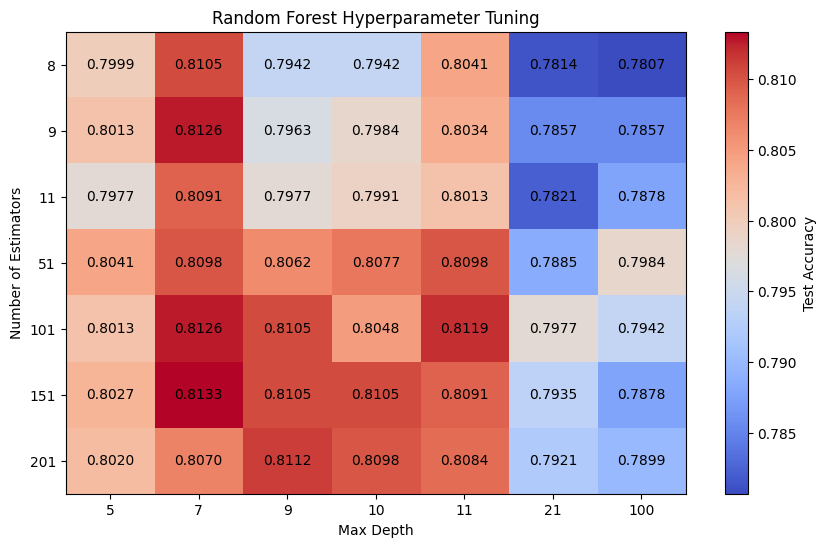

In [68]:
# Values for n_estimators and max_depth to test
n_estimators_list = [8, 9, 11, 51, 101, 151, 201]
max_depth_list = [5, 7, 9, 10, 11, 21, 100]

# Dictionary to store accuracy scores
accuracy_results = {}

# Track the best parameters
best_n, best_depth, best_acc = None, None, 0

# Lists to track train and test accuracies
train_accuracies = []
test_accuracies = []

# Nested loop to test all combinations
for n in n_estimators_list:
    for depth in max_depth_list:
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(x_train, y_train)
        
        # Predictions
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        # Accuracy scores
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        # Store results
        accuracy_results[(n, depth)] = (train_acc, test_acc)
        print(f"n_estimators = {n}, max_depth = {depth}, Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

        # Update best model if current test accuracy is higher
        if test_acc > best_acc:
            best_acc = test_acc
            best_n = n
            best_depth = depth
            best_train_acc = train_acc

    # Track average accuracy per n_estimators
    avg_train_acc = np.mean([accuracy_results[(n, d)][0] for d in max_depth_list])
    avg_test_acc = np.mean([accuracy_results[(n, d)][1] for d in max_depth_list])
    train_accuracies.append(avg_train_acc)
    test_accuracies.append(avg_test_acc)

# Print the best parameters with train and test accuracy
print(f"\nBest parameters: n_estimators = {best_n}, max_depth = {best_depth}")
print(f"Train Accuracy = {best_train_acc:.4f}, Test Accuracy = {best_acc:.4f}\n")

# Convert results to a matrix for visualization (only test accuracy)
test_acc_values = np.array([accuracy_results[(n, d)][1] for n in n_estimators_list for d in max_depth_list]).reshape(len(n_estimators_list), len(max_depth_list))

# Plot results
plt.figure(figsize=(10, 6))
plt.imshow(test_acc_values, cmap="coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar(label="Test Accuracy")

# Label axes
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.yticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.xlabel("Max Depth")
plt.ylabel("Number of Estimators")
plt.title("Random Forest Hyperparameter Tuning")

# Show text values on heatmap
for i in range(len(n_estimators_list)):
    for j in range(len(max_depth_list)):
        plt.text(j, i, f"{test_acc_values[i, j]:.4f}", ha="center", va="center", color="black")

plt.show()

#### Evaluating Random Forest Feature Importance

In [69]:
feature_importances = model.feature_importances_ # applying the method "feature_importances_" on the algorithm
feature_importances # Every feature importance (%)

array([0.02192644, 0.02615852, 0.02154613, 0.15431513, 0.00554927,
       0.02812179, 0.11136125, 0.17051578, 0.01965313, 0.01949294,
       0.01486801, 0.01432955, 0.0103514 , 0.02933359, 0.00695857,
       0.03263138, 0.01294569, 0.02016059, 0.01212532, 0.01547065,
       0.01210189, 0.03147607, 0.00977702, 0.01208505, 0.0118451 ,
       0.01201056, 0.01228607, 0.05235313, 0.0116991 , 0.01660638,
       0.01278958, 0.0130098 , 0.03110731, 0.01303782])

In [70]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
stats.sort_values('importance', ascending=False) # Sorting the data frame

,feature,importance
7,totalcharges,0.170516
3,tenure,0.154315
6,monthlycharges,0.111361
27,contract_Month-to-month,0.052353
15,onlinesecurity_No,0.032631
21,techsupport_No,0.031476
32,paymentmethod_Electronic check,0.031107
13,internetservice_Fiber optic,0.029334
5,paperlessbilling,0.028122
1,partner,0.026159


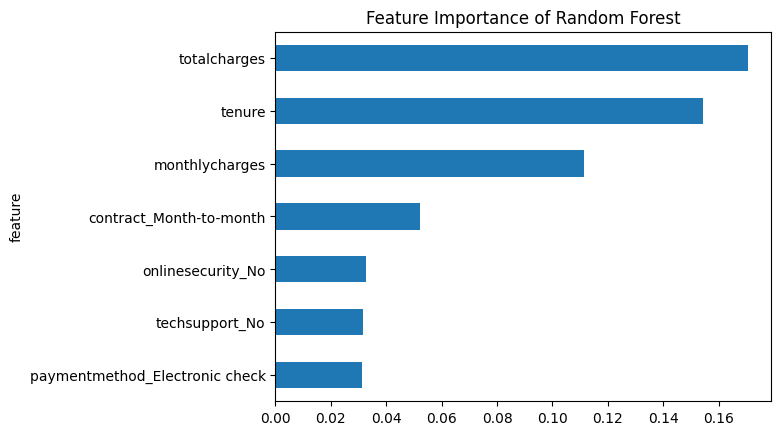

In [71]:
# Threshold value 
threshold = 0.03

# Filter features that meet the threshold
stats_filtered = stats[stats['importance'] >= threshold]

# Sort by importance
stats_sort = stats_filtered.sort_values('importance', ascending=True)

# Plot the filtered data
stats_sort.plot(y='importance', x='feature', kind='barh', legend=False)

# Add title
plt.title('Feature Importance of Random Forest')

# Show plot
plt.show()

#### Train vs Test Accuracy

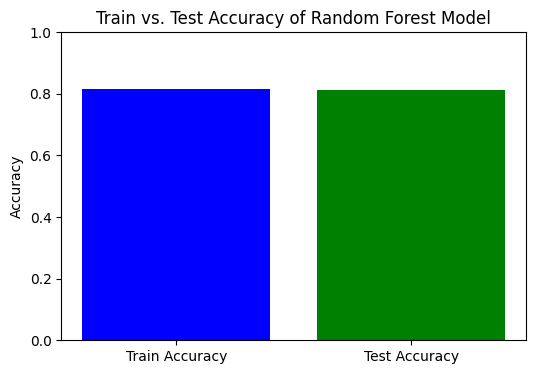

Train Accuracy: 0.8172
Test Accuracy: 0.8133


In [72]:
# Get predictions for the training set
y_train_pred = rf_model.predict(x_train)

# Calculate Train & Test Accuracy
train_accuracy = best_train_acc
test_accuracy = best_acc

# Plot Train vs. Test Accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_accuracy, test_accuracy], color=["blue", "green"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Train vs. Test Accuracy of Random Forest Model")
plt.show()

# Print accuracy values
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


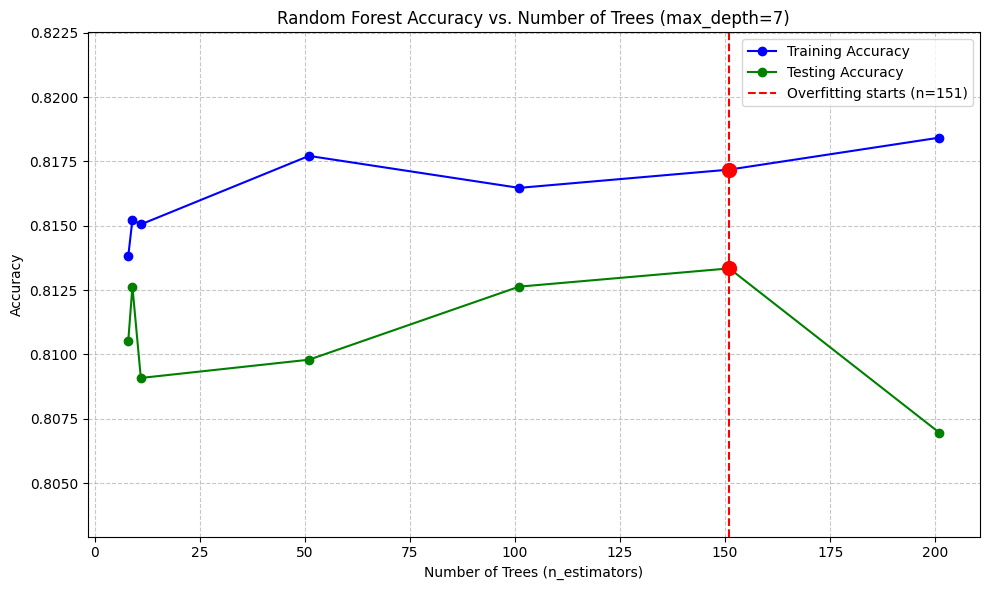

In [73]:
fixed_depth = 7 

train_acc_at_depth7 = [accuracy_results[(n, fixed_depth)][0] for n in n_estimators_list]
test_acc_at_depth7 = [accuracy_results[(n, fixed_depth)][1] for n in n_estimators_list]

overfit_n = 151  # Overfitting starts at n=151

# Step 2: Plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_acc_at_depth7, 'o-', color='blue', label='Training Accuracy')
plt.plot(n_estimators_list, test_acc_at_depth7, 'o-', color='green', label='Testing Accuracy')

# Step 3: Mark overfitting at n=151
if overfit_n in n_estimators_list:
    overfitting_idx = n_estimators_list.index(overfit_n)
    plt.axvline(x=overfit_n, color='red', linestyle='--', label=f'Overfitting starts (n={overfit_n})')
    plt.scatter(overfit_n, train_acc_at_depth7[overfitting_idx], color='red', s=100, zorder=5)
    plt.scatter(overfit_n, test_acc_at_depth7[overfitting_idx], color='red', s=100, zorder=5)

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs. Number of Trees (max_depth=7)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(min(min(train_acc_at_depth7), min(test_acc_at_depth7)) * 0.995,
         max(max(train_acc_at_depth7), max(test_acc_at_depth7)) * 1.005)
plt.tight_layout()
plt.show()

The best test accuracy was 0.8133 at n=151 with max_depth=7,
overfitting was detected when the model stopped generalizing better at n=151.

#### Conclusion

After performing hyperparameter tuning for the Random Forest model, the best parameters were found to be n_estimators = 151 and max_depth = 7, achieving an accuracy of 81.33% and confirms that the model generalizes well to unseen data

# Evaluation + Benchmark

In [74]:
def get_benchmark_predictions(x, benchmark_value): # The function returns a numpy array on the same length as x with all values equal to benchmark_value
    return np.ones(len(x))*benchmark_value


benchmark_value = 0

y_test_pred_Benchmark = get_benchmark_predictions(x_test, benchmark_value)
y_test_pred_Benchmark
# Basicly, our benchmark predicts, always 0 (zero) --> Not Churned (that is actually 73.5%)

array([0., 0., 0., ..., 0., 0., 0.], shape=(1409,))

In [75]:
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7352732434350603

#### Conclusion: Model Performance vs. Benchmark

The benchmark model, which always predicts "Not Churned" (0), achieves 73.53% accuracy. 

All three machine learning models outperform this baseline:
1) Random Forest (81.3%) → Best performer, +7.77% over the benchmark.
2) KNN (80.4%) → Strong, +6.87% improvement.
3) Decision Tree (80.2%) → Slightly behind KNN, +6.67% gain.

### Running the model again with the best hyperparameters:

In [ ]:
rf_model = RandomForestClassifier(n_estimators=151, max_depth=7, random_state=42) 

rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")

### Saving it:
We will use this model in Part B.

In [ ]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')